<a href="https://colab.research.google.com/github/umiSirya/MachineLearning-1/blob/main/wildblueberries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [61]:
df = pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
df.head()


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [62]:
df['RainingDays'].value_counts()

,count
RainingDays,
16.00,194
1.00,192
24.00,188
34.00,187
3.77,16


In [63]:
#if df has null values
df.isnull().sum()

,0
Row#,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


In [64]:
#duplicated rows
df.duplicated().sum()

0

In [65]:
#columns in dataset
print(df.columns)

#datatypes
print(df.dtypes)

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')
Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object


In [66]:
# drop the row column
df = df.drop('Row#', axis=1)

# **Feature Scaling**

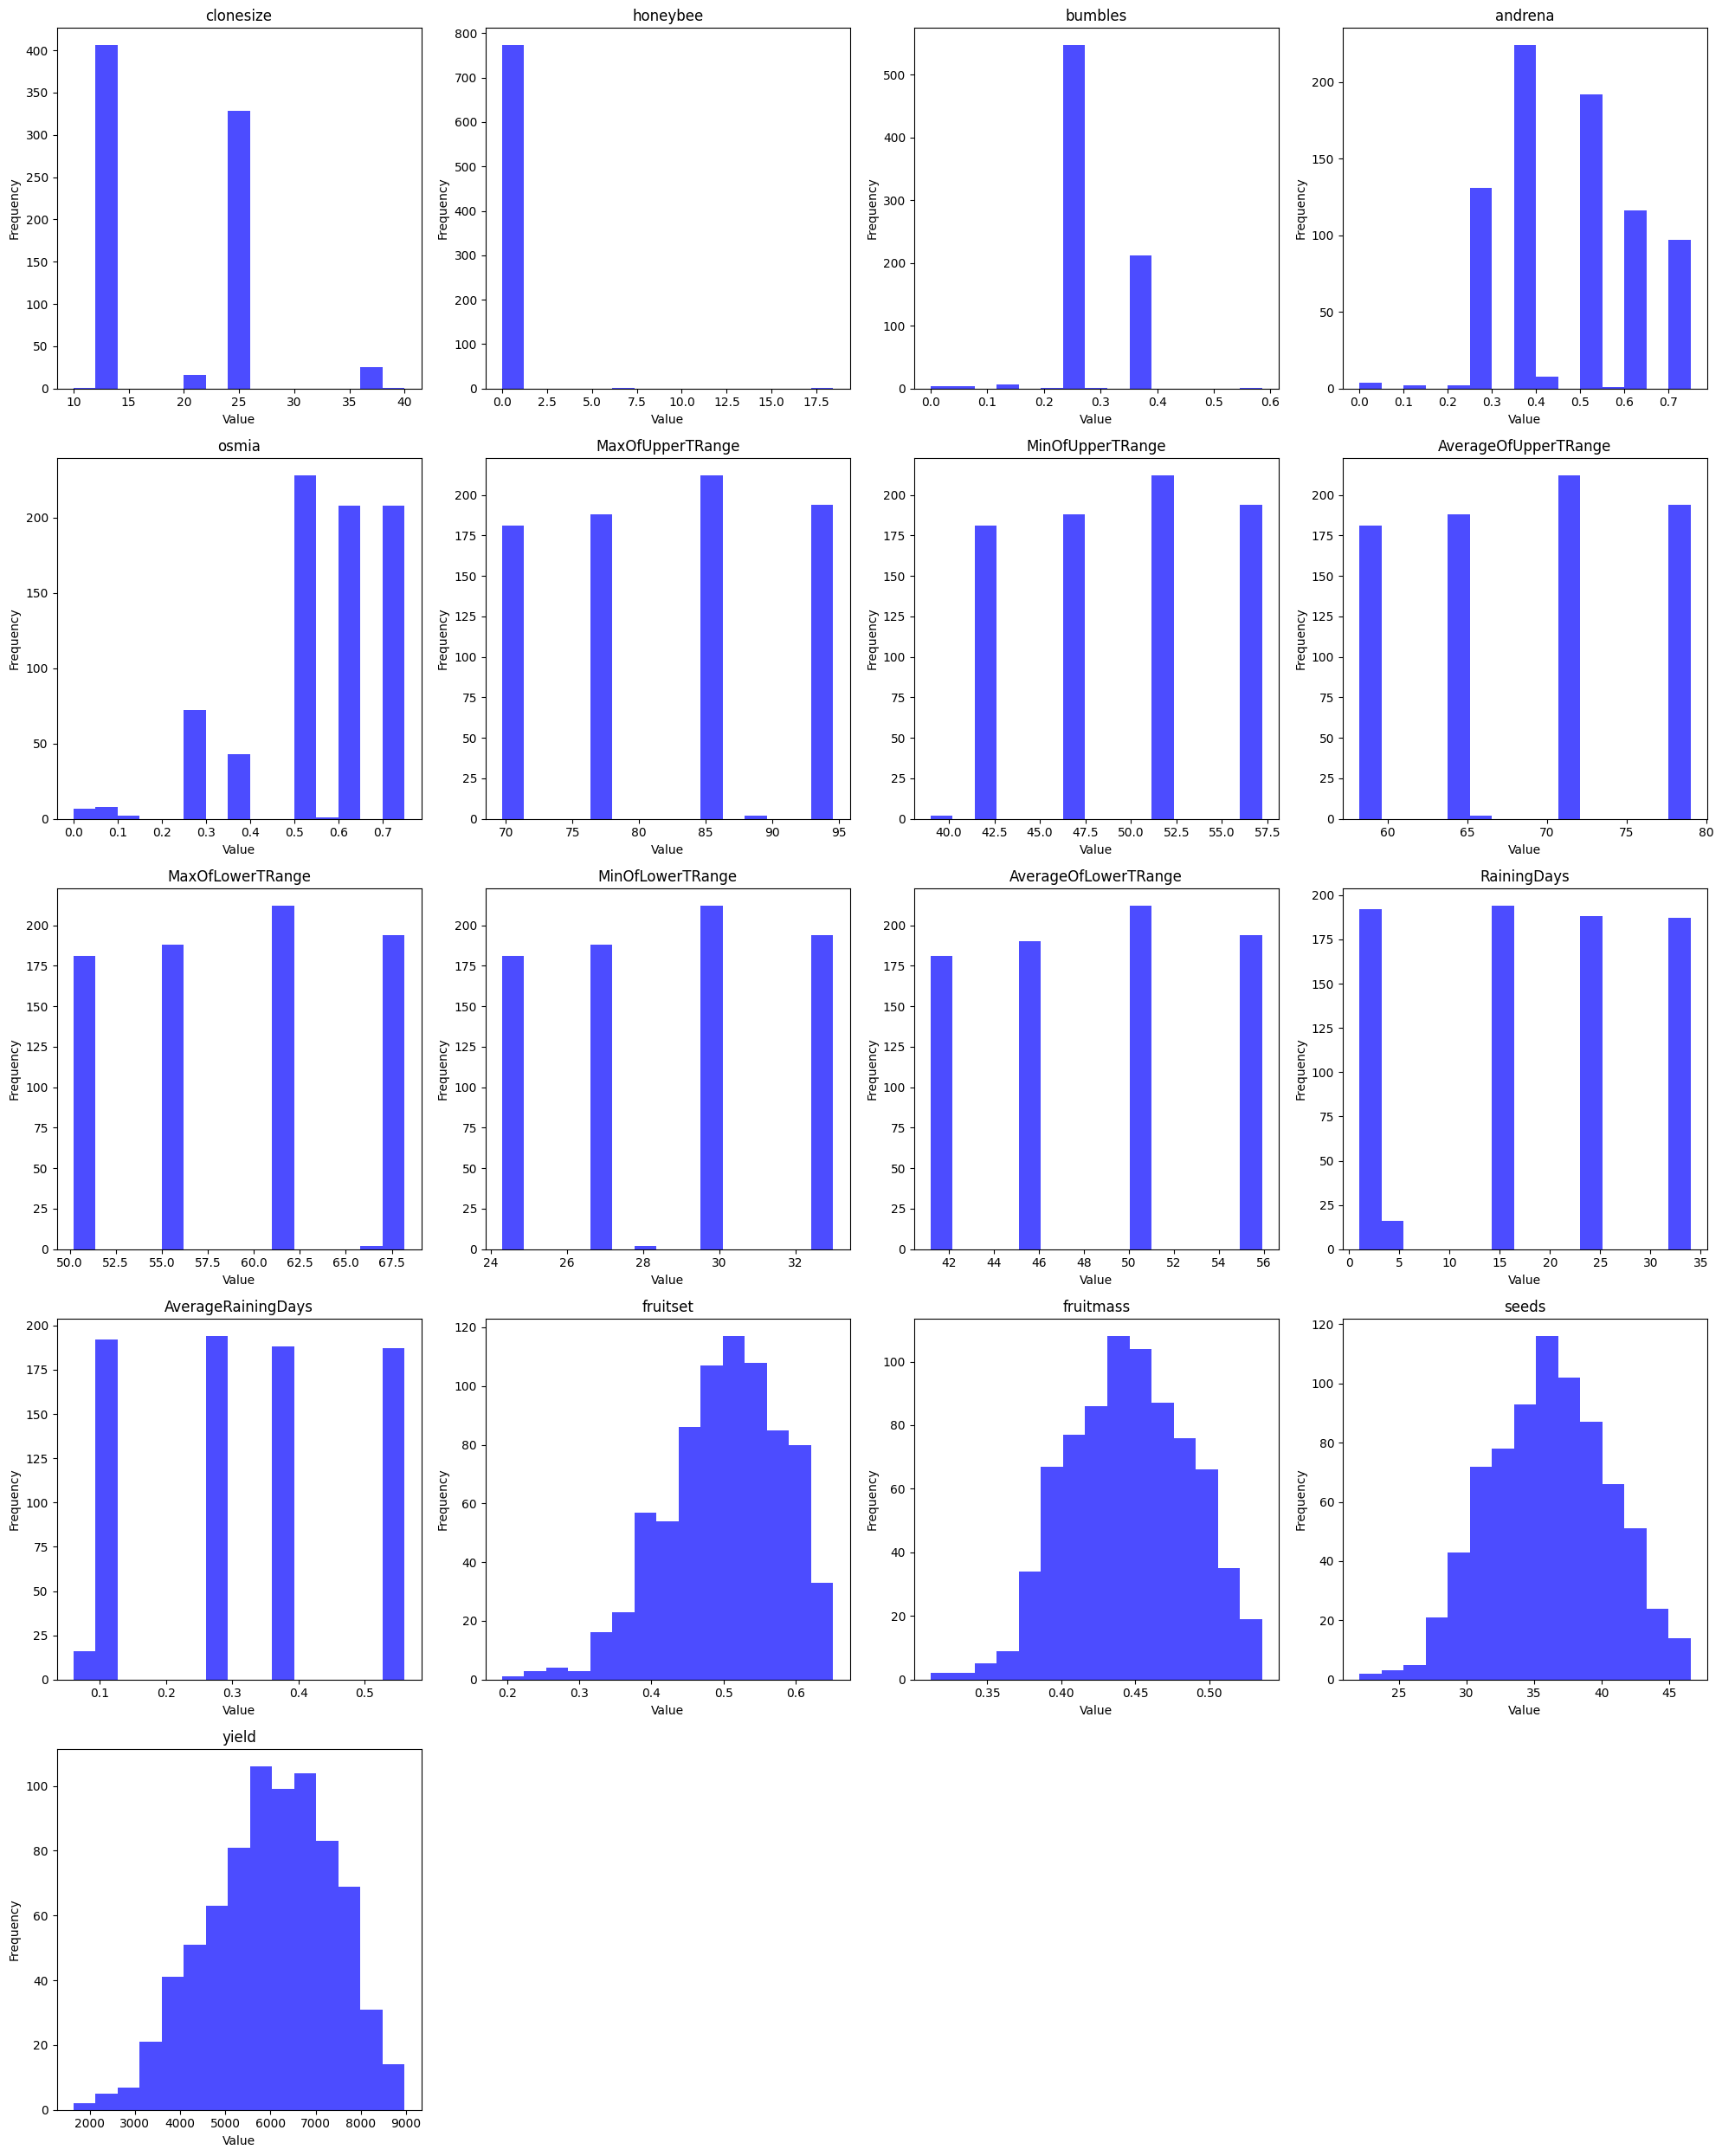

In [67]:
# List of columns to plot
columns_to_plot = [
    'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
    'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
    'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
    'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield'
]

# Adjusting the layout to have 4 charts per row
columns_per_row = 4
num_rows = -(-len(columns_to_plot) // columns_per_row)  # Ceiling division

# Set up the figure with the adjusted number of rows
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=15, color='blue', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
# standardize column fruitset,fruitmass,seeds
columns_to_standardize = ['fruitset', 'fruitmass', 'seeds']
df[columns_to_standardize] = (df[columns_to_standardize] - df[columns_to_standardize].mean()) / df[columns_to_standardize].std()

# normalise columns Average MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange
columns_to_normalise = ['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange','AverageRainingDays','clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']
df[columns_to_normalise] = (df[columns_to_normalise] - df[columns_to_normalise].min()) / (df[columns_to_normalise].max() - df[columns_to_normalise].min())



# **Analysis**

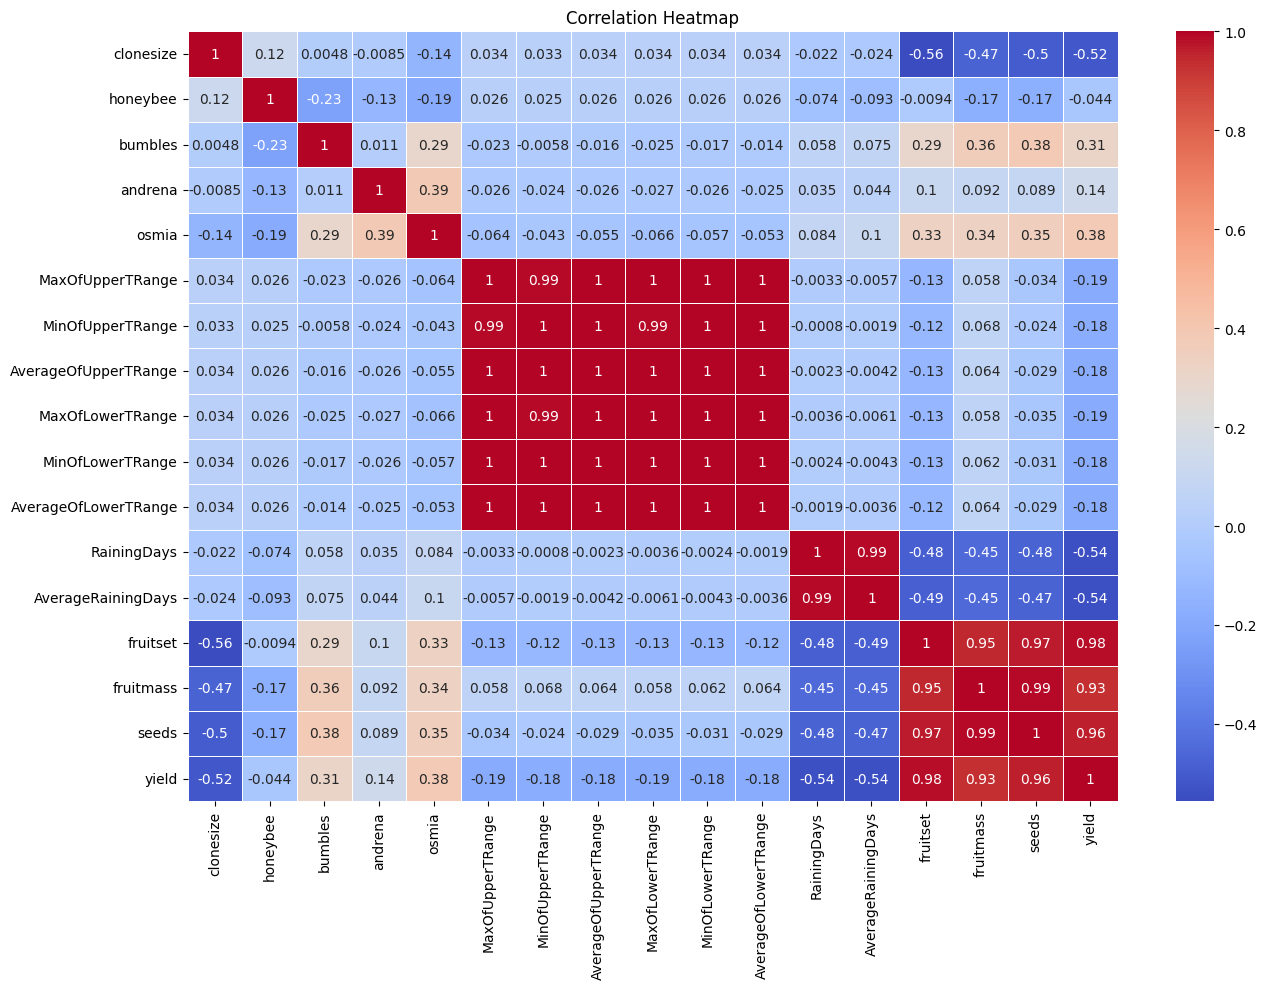

In [69]:
# heatmap of df
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Linear Regression**

In [70]:
# max value on yeild column
max_yield = df['yield'].max()
print("Maximum Yield:", max_yield)

#minimum value on yeild column
min_yield = df['yield'].min()
print("Minimum Yield:", min_yield)

Maximum Yield: 8969.401842
Minimum Yield: 1637.704022


In [71]:
from sklearn.model_selection import train_test_split

# remove the target variable from df dataset
X = df.drop('yield', axis=1)

# Extract the target variable from prediction
y = df['yield']

# split my data into train and test set and create a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
#initialize and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# cross-validate the the trained set

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the average cross-validation score
cv_rmse_scores = (-cv_scores) ** 0.5  # Convert to RMSE
average_rmse = cv_rmse_scores.mean()

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Average RMSE: {average_rmse}")



Cross-Validation RMSE Scores: [ 113.39788248 1873.02503379  117.8881026   135.58364079  129.27802063]
Average RMSE: 473.8345360568017


In [73]:
#making the predictions

y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate r-squared
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Mean Squared Error: 16819.250441221102
R-squared: 0.9913464650064018
RMSE: 129.68905289661538


In [74]:
# give the predicted value for the first record in
print("Predicted Price for the first record:", y_pred[0])

# the yeild value in the first row
print("Actual Price for the first record:", y_test.iloc[0])

Predicted Price for the first record: 4199.111883347357
Actual Price for the first record: 4282.700632


# **Polynomial Regression**

In [75]:
# create polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#fit the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

#make the predictions
y_pred_poly = model_poly.predict(X_test_poly)

#print the prediction of the yeild in the first row
print("Predicted Price for the first record:", y_pred_poly[0])

#actual value of the yeild in the first row
print("Actual Price for the first record:", y_test.iloc[0])

Predicted Price for the first record: 4304.453125
Actual Price for the first record: 4282.700632


In [76]:
# evaluate my model using both MSE and r-squared
mse_poly = mean_squared_error(y_test, y_pred_poly)
r_squared_poly = model_poly.score(X_test_poly, y_test)

# print the results
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r_squared_poly)

# squareroot of 1.3643781510831192e+19
rmse_poly = np.sqrt(mse_poly)
print("RMSE (Polynomial Regression):", rmse_poly)

Mean Squared Error (Polynomial Regression): 1682629.6357315814
R-squared (Polynomial Regression): 0.134283986973469
RMSE (Polynomial Regression): 1297.1621470469995


**Lasso**

In [77]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Define and train the Lasso model
lasso_model = Lasso(alpha=1, random_state=42)  # You can tune alpha as needed
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

#calculate r-squared
r_squared = lasso_model.score(X_test, y_test)
print("R-squared:", r_squared)

# Display the coefficients of the model
print("Coefficients:", lasso_model.coef_)


Test RMSE: 123.66493205064599
R-squared: 0.9921317157058082
Coefficients: [-127.69968196  326.66630256   10.27304493  208.46777566  358.13363611
   -0.           -0.         -209.64473101   -0.           -0.
   -0.          -11.6889575    -0.          816.09887867 -512.00956439
  905.25556715]


**Ridge Regression**

In [83]:
from sklearn.linear_model import Ridge

# Initialize Ridge model with a chosen alpha value
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")

# Coefficients of the Ridge model
print("Coefficients:", ridge_model.coef_)


Test RMSE: 127.49965068714066
Coefficients: [-2.78468982e+02  1.15885781e+03  1.61863934e+02  2.71004850e+02
  3.94668851e+02 -1.68109730e+01 -1.42599203e+02 -6.89825512e+01
  3.44604780e+01 -6.56449426e+01 -1.35540609e+01  1.14450845e+00
 -5.07566966e+02  6.19884730e+02 -5.87547135e+02  1.14158340e+03]


**Elastic Net**

In [90]:

from sklearn.linear_model import ElasticNet

# Initialize Elastic Net model with default parameters
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # l1_ratio controls Lasso (1) vs Ridge (0)
elastic_net_model.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate RMSE for the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE directly
print(f"Test RMSE: {rmse}")

# Cross-validation
cv_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5  # Convert negative MSE to RMSE
print(f"Cross-Validation RMSE Scores: {cv_rmse}")
print(f"Average Cross-Validation RMSE: {cv_rmse.mean()}")

# Print coefficients
print("Coefficients:", elastic_net_model.coef_)


Test RMSE: 160.22042837835502
Cross-Validation RMSE Scores: [135.2916284  172.87479727 193.6476875  179.41434188 191.16058704]
Average Cross-Validation RMSE: 174.477808417032
Coefficients: [-179.80679734   57.50320109   41.69495702  138.33763978  230.51620716
  -75.54543172  -59.86059228  -75.48662358  -76.70161813  -74.55778705
  -74.47239968  -13.96549867  -22.49845349  619.05937857  191.34331037
  362.4078329 ]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
